
🧠 Project Summary: Predicting Purchase Behavior with Neural Network
to predict whether a customer will make a purchase based on two features

1 📊
Dataset of 200 samples with two features:
    VisitDuration: how long a user visited a website
    PagesVisited: how many pages the user visited
    Purchase: If the sum of VisitDuration + PagesVisited > 1→ the user purchased (1)  did not purchase (0)

2 🧪
80% for training the model
20% for testing the model's performance

3 🧱
TensorFlow/Keras to create a simple neural network
    1 hidden layer with 10 neurons (ReLU activation)
    1 output neuron with sigmoid activation (for binary classification)

4  📊
📉 Visualized Training Progress
📍 Visualized Decision Boundary
📋 Compared Predictions vs Actual

 Final Result
Supervised Machine Learn
binary classification model using synthetic data.
evaluated it with 0.82 = 82% correct
visualized training progress and the model's decision boundary.
Accuracy is increasing
Loss is decreasing
The decision boundary is non-linear, showing the NN captured complex relationships.

Murilo Farias
2025-06-11

In [ ]:
pip install scikit-learn
pip install pandas
pip install tensorflow
pip install matplotlib

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. GENERATE SYNTHETIC DATA
np.random.seed(0)
data_size = 200

In [3]:
# Two features: VisitDuration and PagesVisited
features = np.random.rand(data_size, 2)

In [4]:
# Label is 1 (purchase) if the sum of both features > 1, else 0
labels = (features[:, 0] + features[:, 1] > 1).astype(int)

In [5]:
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [6]:
# Check dataset structure and preview
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VisitDuration  200 non-null    float64
 1   PagesVisited   200 non-null    float64
 2   Purchase       200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB
   VisitDuration  PagesVisited  Purchase
0       0.548814      0.715189         1
1       0.602763      0.544883         1
2       0.423655      0.645894         1
3       0.437587      0.891773         1
4       0.963663      0.383442         1


In [23]:
print(df)

     VisitDuration  PagesVisited  Purchase
0         0.548814      0.715189         1
1         0.602763      0.544883         1
2         0.423655      0.645894         1
3         0.437587      0.891773         1
4         0.963663      0.383442         1
..             ...           ...       ...
195       0.062713      0.424032         0
196       0.258684      0.849038         1
197       0.033305      0.958983         0
198       0.355369      0.356707         0
199       0.016329      0.185232         0

[200 rows x 3 columns]


In [7]:
# 2. SPLIT THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[['VisitDuration', 'PagesVisited']],
    df['Purchase'],
    test_size=0.2,
    random_state=42
)

In [ ]:
# 3. BUILD & TRAIN THE MODEL (train only once)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple neural network
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Hidden layer with 10 neurons
    Dense(1, activation='sigmoid')                   # Output layer for binary classification
])

#relu is an activation function that introduces non-linearity
#helping the model learn complex patterns in the data.

#Layer 1: Dense 2 inputs 10 outputs activation='relu'
#Layer 2: Dense 10 inputs 1 output activation='sigmoid'


In [ ]:
# Compile the model using Adam optimizer and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#optimizer='adam' is an efficient gradient descent algorithm
#loss='binary_crossentropy' is suitable for binary classification tasks yes/no 0/1
#metrics=['accuracy'] to monitor the model's performance during training


In [ ]:
# Train the model ONCE and store the training history
history = model.fit(
    X_train,
    y_train,
    epochs=10, #epochs means number of times the model will see the entire dataset
    batch_size=10, #batch size means number of samples processed before the model is updated
    validation_split=0.2, #validation split means percentage of training data to be used for validation
    verbose=1 #verbose=1 means to print the training progress
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6374 - loss: 0.6510 - val_accuracy: 0.6875 - val_loss: 0.6395
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6251 - loss: 0.6469 - val_accuracy: 0.7188 - val_loss: 0.6359
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6616 - loss: 0.6458 - val_accuracy: 0.7188 - val_loss: 0.6325
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7195 - loss: 0.6390 - val_accuracy: 0.7500 - val_loss: 0.6289
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6373 - loss: 0.6405 - val_accuracy: 0.7500 - val_loss: 0.6253
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7065 - loss: 0.6373 - val_accuracy: 0.7500 - val_loss: 0.6213
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7689 - loss: 0.6300 - val_accuracy: 0.7812 - val_loss: 0.6175
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7191 - loss: 0.6358 - val_accuracy: 0.8125 - val_loss:

In [12]:
# 4. EVALUATE THE MODEL
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {accuracy:.2f} (on unseen test data)")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8104 - loss: 0.5987

 Test Accuracy: 0.82 (on unseen test data)


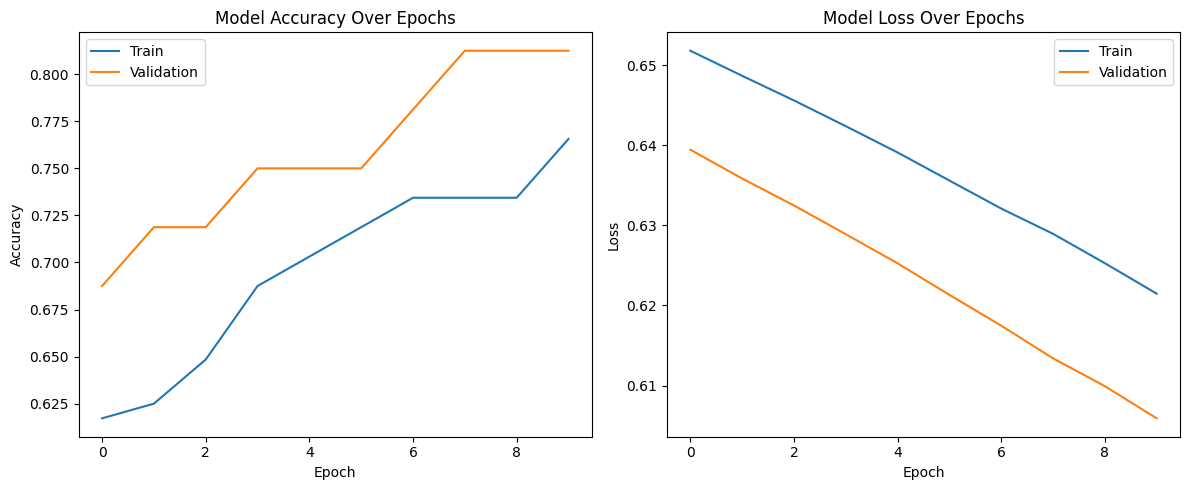

In [14]:
# 5. PLOT TRAINING METRICS
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# 6. VISUALIZE DECISION BOUNDARY
# Create a grid of points in the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

In [16]:
# Predict the probability for each point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
Z = Z.reshape(xx.shape)

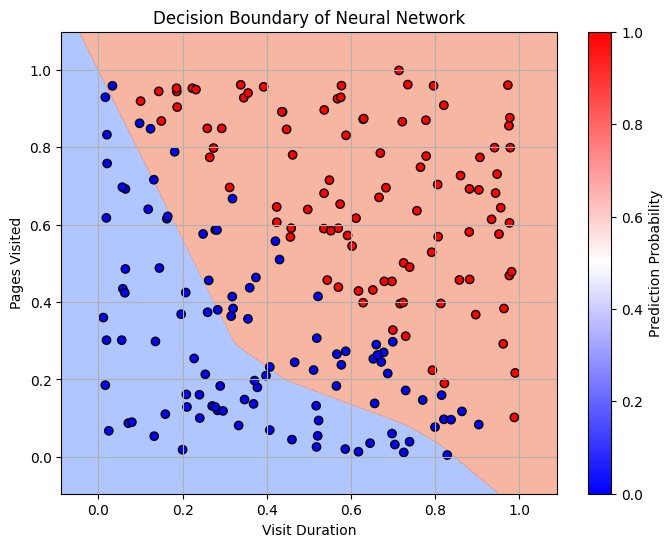

In [17]:
# Plot decision boundary and scatter actual points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.7, cmap='coolwarm')
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k', cmap='bwr')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.colorbar(label='Prediction Probability')
plt.grid(True)
plt.show()

In [22]:
# Add Validation column (True if prediction matches actual)
comparison_df['Validation'] = comparison_df['ActualPurchase'] == comparison_df['PredictedPurchase']

# Sort by Validation (False first)
comparison_df = comparison_df.sort_values(by='Validation').reset_index(drop=True)

# Show full result
print(comparison_df.to_string(index=False))


 VisitDuration  PagesVisited  ActualPurchase  PredictedPurchase  Validation
      0.097844      0.862192               0                  1       False
      0.420539      0.557369               0                  1       False
      0.407241      0.232234               0                  1       False
      0.699479      0.297437               0                  1       False
      0.729991      0.171630               0                  1       False
      0.318569      0.667410               0                  1       False
      0.181151      0.788546               0                  1       False
      0.618015      0.428769               1                  1        True
      0.725254      0.501324               1                  1        True
      0.569965      0.590873               1                  1        True
      0.355613      0.940432               1                  1        True
      0.398221      0.209844               0                  0        True
      0.5356